# Hiptmair Problem

In [1]:
from netgen.meshing import *
from netgen.csg import *
from netgen.occ import *
from ngsolve import *
from ngsolve.webgui import Draw
from netgen.webgui import Draw as DrawGeo
import math
import sys
sys.path.append('..\include')
from MatrixSolver import MatrixSolver as solver 
cpp_solver="EMPY"
#cpp_solver="JP_MARs"

In [2]:
h=0.05
r=0.1
a=0.01
curveOrder=1
conductor = Cylinder((0,0,0), Z, r=0.01, h=h)
conductor.faces.name="conductorBND"
conductor.faces.Max(Z).name="in"
conductor.faces.Min(Z).name="out"
conductor.mat("sig")
conductor.maxh=a/5
crosssection = conductor.faces.Max(Z).mass
print(crosssection)

outer = Cylinder((0,0,0), Z, r=0.1, h=h)
outer.faces.name = "outer"
air = outer-conductor
air.faces.Max(Z).name="upper"
air.faces.Min(Z).name="lower"
air.mat("air")
air.maxh=r/5
model=Glue([conductor,air])
DrawGeo(model)
geo =OCCGeometry(model)
with TaskManager():
    #mesh = Mesh(geo.GenerateMesh(meshsize.coarse, quad_dominated=True)).Curve(1)
    #mesh = Mesh(geo.GenerateMesh(meshsize.fine)).Curve(1)
    mesh = Mesh(geo.GenerateMesh(meshsize.fine)).Curve(1) 
Draw(mesh)


0.0003141592653589792


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'ngsolve_version': 'Netgen x.x', 'mesh_dim': 3…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [3]:
jomega=True
feOrder=1
mu = 4*math.pi*1e-7
c = 299792458.;
eps = 1/(c*c*mu)
sigma = mesh.MaterialCF({ "sig" : 1e6 }, default=0)
freq=1.
s=2j*math.pi*freq
fesA = HCurl(mesh, order=feOrder, nograds=True,  dirichlet="out|in|upper|lower|outer", complex=True)
fesPhi=H1(mesh, order=feOrder,  definedon="sig", dirichlet="out|in", complex=True)
fesAPhi=fesA*fesPhi
(A,phi), (N, psi) = fesAPhi.TnT()

In [4]:
a=BilinearForm(fesAPhi)
a += 1/mu*curl(A)*curl(N)*dx
a += sigma*s*(A+grad(phi))*(N+grad(psi))*dx("sig")
#a += eps*s*s*(A+grad(phi))*grad(psi)*dx()
#a += eps*s*s*grad(phi)*(N+grad(psi))*dx(bonus_intorder=3)
#a += eps*s*s*(A+grad(phi))*(N+grad(psi))*dx
with TaskManager():
    a.Assemble()

In [5]:
Vin=h/s
gfAPhi=GridFunction(fesAPhi)
gfA, gfPhi=gfAPhi.components
#gfPhi.Set(Vin, BND, mesh.Boundaries("in|upper"))
gfPhi.Set(Vin, BND, mesh.Boundaries("in"))
f=LinearForm(fesAPhi)
r=f.vec-a.mat*gfAPhi.vec


enter iccg_solve
Dof= 30400    matrix size= 264708.0
shift parameter= 1.0
minimum residual= 1.4531850024468983e-14  at iteraions:  129


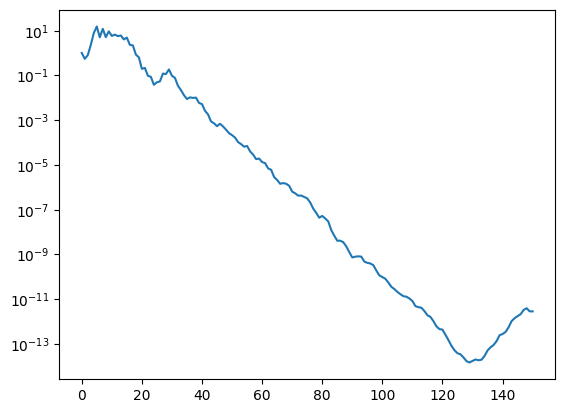

結果のノルム: 2.8021422238098176e-12
power=  (0.0024522946299176127-60.64292615453898j)


In [6]:
gfAPhi=solver.iccg_solve(fesAPhi, gfAPhi, a, r.Evaluate(), tol=1.e-20, max_iter=2000,
                         div_iter=100, div_fac=100., accel_factor=0, logplot=True, complex=jomega, cpp_solver=cpp_solver,
                        scaling=False)

In [7]:
Draw (gfPhi, mesh, order=3, deformation=False)
Draw (gfA, mesh, order=3, deformation=False)
J=-s*sigma*(gfA+grad(gfPhi))
Draw (J, mesh, order=1, deformation=False)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

JP=MARs shift parameter= 1.1

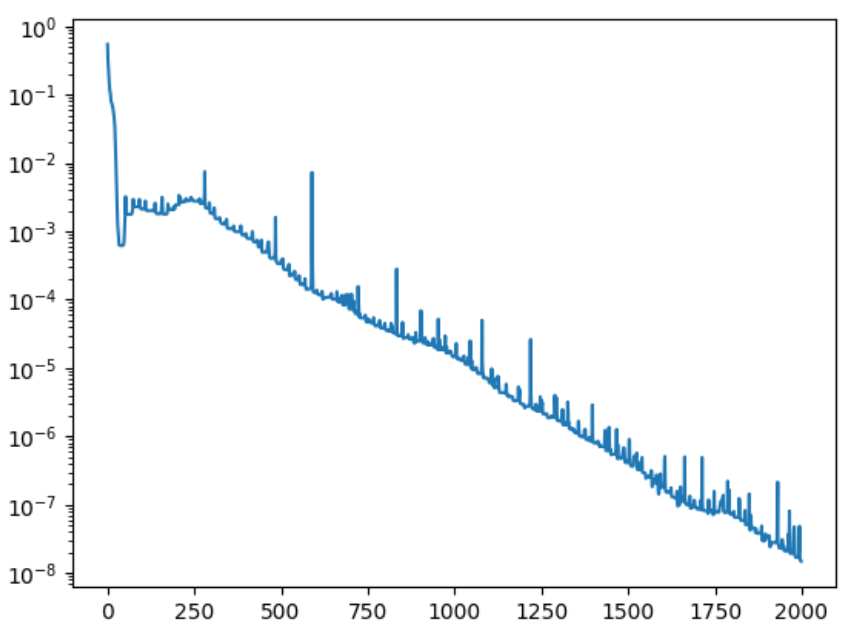

EMPY shift parameter= 1.0

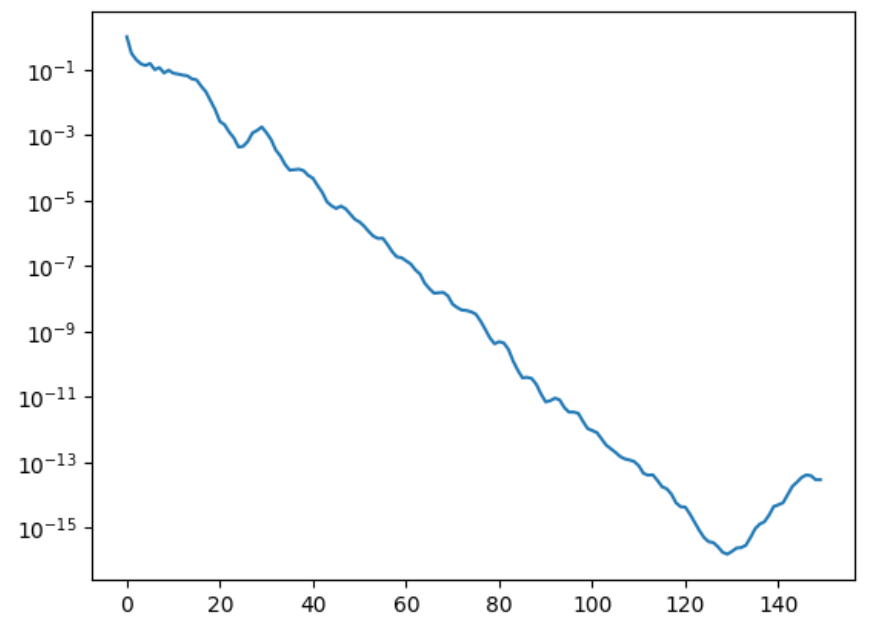